# **Lab: Neural Networks**
---
## Exercise 3: Binary Classification

The dataset we will be using is the German Credit Data.

The data was originally published by Professor Dr. Hans Hofmann
Institut f"ur Statistik und "Okonometrie
Universit"at Hamburg
FB Wirtschaftswissenschaften
Von-Melle-Park 5
2000 Hamburg 13

It is composed of 20 numerical variables plus the response variable.

Each observation represents a single application for a credit for an individual. The features correspond to the financial profile of the applicant.

The data dictionary can be found here: [German Credit Data Dictionary](https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.doc)

The original dataset is avalaible from UCI: [German Credit Data](http://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data))


A CSV version of this dataset is avaliable here: [link](https://online.stat.psu.edu/onlinecourses/sites/stat508/files/german_credit.csv)


Our goal is to build a Neural Network model that can predict if a new lead is creditworthy or not

## Instructions

This is a guided exercise where some of the code have already been pre-defined. Your task is to fill the remaining part of the code (it will be highlighted with placehoders) to train and evaluate your model.

The steps are:
1.   Launch Docker image
2.   Loading and Exploration of the Dataset
3.   Preparing the Dataset
4.   Defining the Architecture of the Multi-Layer Perceptron
5.   Training and Evaluation of the Model
6.   Analysing the Results
7.   Push changes

It is recommended to try adding regularization in this exercise with:
- [l1/l2 regularizer](https://www.tensorflow.org/api_docs/python/tf/keras/regularizers/Regularizer)
- [dropout layer](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout)

## Exercise 3

### 1. Launch Docker image

**[1.1]** Go to the folder you created previously

In [ ]:
# Placeholder for student's code (command line)

In [ ]:
# Solution:
cd /Users/anthonyso/Projects/adv_mla_2024

**[1.2]** Run the built Docker image

In [ ]:
# Placeholder for student's code (command line)

In [ ]:
# Solution:
docker run  -dit --rm --name adv_mla_lab_8 -p 8888:8888 -v ~/Projects/adv_mla_2024/adv_mla_lab_8:/home/jovyan/work/ tensorflow-jupyter:latest

Syntax: docker run [OPTIONS] IMAGE

Options:

`-dit: Run container in background and interactive`

`--rm: Automatically remove the container when it exits`

`--name: Assign a name to the container`

`-p: Publish a container's port(s) to the host`

`-e: Set environment variables`

`-v Bind mount a volume`

Documentation: https://docs.docker.com/engine/reference/commandline/run/

**[1.3]** Display last 50 lines of logs

In [ ]:
# Placeholder for student's code (command line)

In [ ]:
# Solution
docker logs --tail 50 adv_mla_lab_8

Syntax: docker logs [OPTIONS] CONTAINER

Options:

`--tail: Number of lines to show from the end of the logs`

Documentation: https://docs.docker.com/engine/reference/commandline/logs/

**[1.4]** Copy the url displayed and paste it to a browser in order to launch Jupyter Lab

**[1.5]** Create a new git branch called `tf_bin_class`

In [ ]:
# Placeholder for student's code (command line)

In [ ]:
# Solution
git checkout -b tf_bin_class

**[1.6]** Create a subfolder `models/tf_bin_class`

In [ ]:
# Placeholder for student's code (command line)

In [ ]:
# Solution:
mkdir models/tf_bin_class

**[1.7]** Navigate the folder `notebooks` and create a new jupyter notebook called `3_tf_binaryclass.ipynb`

### 2. Loading and Exploration of the Dataset

**[2.1]** Import the package pandas

In [ ]:
# Placeholder for student's code

In [1]:
# Solution
import pandas as pd

**[2.2]** Load the CSV file using [.read_csv()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) into a variable called `df`

In [2]:
# Placeholder for student's code

In [19]:
# Solution 
df = pd.read_csv("../data/raw/german_credit.csv")

**[2.3]** Explore the first rows of the dataframe using [.head()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html?highlight=head#pandas.DataFrame.head)

In [ ]:
# Placeholder for student's code

In [20]:
# Solution
df.head()

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2


**[2.4]** Print out at the descriptive statistics for the numerical variables using[.describe()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html?highlight=describe#pandas.DataFrame.describe)

In [ ]:
# Placeholder for student's code

In [21]:
# Solution
df.describe()

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,...,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.700000,2.577000,20.903000,2.54500,2.828000,3271.24800,2.105000,3.384000,2.973000,2.68200,...,2.845000,2.358000,35.54200,2.675000,1.928000,1.407000,2.904000,1.155000,1.404000,1.037000
std,0.458487,1.257638,12.058814,1.08312,2.744439,2822.75176,1.580023,1.208306,1.118715,0.70808,...,1.103718,1.050209,11.35267,0.705601,0.530186,0.577654,0.653614,0.362086,0.490943,0.188856
min,0.000000,1.000000,4.000000,0.00000,0.000000,250.00000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,19.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,1.000000,12.000000,2.00000,1.000000,1365.50000,1.000000,3.000000,2.000000,2.00000,...,2.000000,1.000000,27.00000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
50%,1.000000,2.000000,18.000000,2.00000,2.000000,2319.50000,1.000000,3.000000,3.000000,3.00000,...,3.000000,2.000000,33.00000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
75%,1.000000,4.000000,24.000000,4.00000,3.000000,3972.25000,3.000000,5.000000,4.000000,3.00000,...,4.000000,3.000000,42.00000,3.000000,2.000000,2.000000,3.000000,1.000000,2.000000,1.000000
max,1.000000,4.000000,72.000000,4.00000,10.000000,18424.00000,5.000000,5.000000,4.000000,4.00000,...,4.000000,4.000000,75.00000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000


**[2.5]** Plot the distribution of the target variable using [.hist()](https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.pyplot.hist.html) and [.show()](https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.pyplot.show.html?highlight=show#matplotlib.pyplot.show) from matplotlib

In [ ]:
# Placeholder for student's code

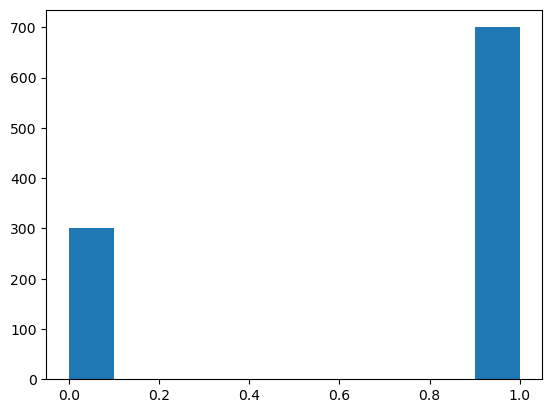

In [22]:
# Solution
import matplotlib.pyplot as plt
plt.hist(df['Creditability'])
plt.show()

### 3.   Preparing the Dataset

**[3.1]** Extract the target variable `Creditability` using [.pop()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pop.html?highlight=pop#pandas.DataFrame.pop) into a variable called `y`

In [23]:
# Placeholder for student's code

In [24]:
# Solution
y = df.pop('Creditability')

**[3.2]** Import the [train_test_split()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) from sklearn


In [25]:
# Placeholder for student's code

In [26]:
# Solution
from sklearn.model_selection import train_test_split

**[3.3]** Split the data into training and testing sets using a 80/20 ratio with [train_test_split()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) from sklearn

In [27]:
# Placeholder for student's code

In [28]:
# Solution
X_train, X_test, y_train, y_test =  train_test_split(df, y, test_size=0.2, random_state=8)

**[3.4]** Print out at the dimensions of the 4 variables you created

In [29]:
# Placeholder for student's code

In [30]:
# Solution
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(800, 20)
(200, 20)
(800,)
(200,)


**[3.5]** Import [scale()](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html?highlight=scale#sklearn.preprocessing.scale) from sklearn


In [31]:
# Placeholder for student's code

In [32]:
# Solution
from sklearn.preprocessing import scale

**[3.6]** Perform standardisation on the training and testing sets using [scale()](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html?highlight=scale#sklearn.preprocessing.scale) from sklearn

In [33]:
# Placeholder for student's code

In [34]:
# Solution
scaled_X_train = scale(X_train)
scaled_X_test = scale(X_test)

**[3.7]** Print the scaled values of the first observation of the training set

In [35]:
# Placeholder for student's code

In [36]:
# Solution
print(scaled_X_train[0])

[-1.23146348  1.00545805  1.36798424 -0.30099193  0.32865798  0.57514249
 -0.30732498 -1.71451695 -0.98883806 -0.3040227   1.0606442   0.60675358
 -1.09202537  0.46460993  0.16385435  1.06145721  0.17740144 -0.43033148
 -0.81649658 -0.20077872]


### 4.   Defining the Architecture of the Multi-Layer Perceptron

**[4.1]** Import tensorflow and numpy

In [37]:
# Placeholder for student's code

In [38]:
# Solution
import tensorflow as tf
import numpy as np

**[4.2]** Set the seeds for tensorflow and numpy in order to get reproducible results

In [39]:
# Placeholder for student's code

In [40]:
# Solution
tf.random.set_seed(42)

**[4.3]** Create a l1 and l2 regulariser using [l1_l2](https://www.tensorflow.org/api_docs/python/tf/keras/regularizers/L1L2) and save it into a variable called `regularizer`

In [41]:
# Placeholder for student's code

In [42]:
# Solution
regularizer = tf.keras.regularizers.l1_l2(l1=0.01, l2=0.01)

**[4.4]** Instantiate a [.Sequential()](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential) class called `model`

In [43]:
# Placeholder for student's code

In [44]:
# Solution
model = tf.keras.Sequential()

**[4.5]** Import the [Dense()](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense) and [Dropout()](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout) classes

In [45]:
# Placeholder for student's code

In [46]:
# Solution
from tensorflow.keras.layers import Dense, Dropout

**[4.6]** Create a hidden layer of 128 fully connected neurons with ReLU as the activation function followed by another fully connected layer responsible of making final predictions.

In [47]:
# Placeholder for student's code

In [48]:
# Solution
layer1 = Dense(128, activation='relu', input_shape=[20], kernel_regularizer=regularizer)
top_layer = Dense(1, activation='sigmoid')

**[4.7]** Assemble the 2 fully-connected layers we just defined. We will be using the [.add()](https://www.tensorflow.org/api_docs/python/tf/keras/layers/add) method

In [49]:
# Placeholder for student's code

In [50]:
# Solution
model.add(layer1)
model.add(top_layer)

**[4.8]** Instantiate a [RMSprop()](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/RMSprop) with 0.01 as learning rate and call it `optimizer`

In [51]:
# Placeholder for student's code

In [52]:
# Solution
optimizer = tf.keras.optimizers.RMSprop(0.001)

**[4.9]** Configure the learning process using the [.compile()](https://www.tensorflow.org/api_docs/python/tf/keras/Model#methods_2) method and specify the loss function, optimizer and the metrics to be used.

In [53]:
# Placeholder for student's code

In [54]:
# Solution
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

**[4.10]** Print out the model architecture with [.summary()](https://www.tensorflow.org/api_docs/python/tf/keras/Model#summary)

**Task: Print the summary of the model**

In [55]:
# Placeholder for student's code

In [56]:
# Solution
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               2688      
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 2817 (11.00 KB)
Trainable params: 2817 (11.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 5. Training and Evaluation of the Model

**[5.1]** Train the model using [.fit()](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit) on the training set on 50 epochs and create a validation set (20%)

In [57]:
# Placeholder for student's code

In [58]:
# Solution
history = model.fit(scaled_X_train, y_train, epochs=50, validation_split = 0.2)

Epoch 1/50
20/20 [==============================] - 0s 5ms/step - loss: 3.1823 - accuracy: 0.6844 - val_loss: 2.8245 - val_accuracy: 0.7312
Epoch 2/50
20/20 [==============================] - 0s 1ms/step - loss: 2.6287 - accuracy: 0.7234 - val_loss: 2.3768 - val_accuracy: 0.7312
Epoch 3/50
20/20 [==============================] - 0s 1ms/step - loss: 2.2027 - accuracy: 0.7344 - val_loss: 1.9948 - val_accuracy: 0.7125
Epoch 4/50
20/20 [==============================] - 0s 1ms/step - loss: 1.8339 - accuracy: 0.7391 - val_loss: 1.6657 - val_accuracy: 0.7250
Epoch 5/50
20/20 [==============================] - 0s 1ms/step - loss: 1.5201 - accuracy: 0.7563 - val_loss: 1.3868 - val_accuracy: 0.7125
Epoch 6/50
20/20 [==============================] - 0s 1ms/step - loss: 1.2556 - accuracy: 0.7547 - val_loss: 1.1544 - val_accuracy: 0.7125
Epoch 7/50
20/20 [==============================] - 0s 1ms/step - loss: 1.0375 - accuracy: 0.7641 - val_loss: 0.9666 - val_accuracy: 0.7125
Epoch 8/50
20/20 [==

**[5.2]** Evaluate the performance of this model on the testing set using [.evaluate()](https://www.tensorflow.org/api_docs/python/tf/keras/Model#evaluate)

In [59]:
# Placeholder for student's code

In [60]:
# Solution
model.evaluate(scaled_X_test, y_test)

7/7 [==============================] - 0s 918us/step - loss: 0.5753 - accuracy: 0.7350


[0.5752631425857544, 0.7350000143051147]

### 6. Analysing the Results

**[6.1]** Plot the learning curve for accuracy score on the training and validation sets. We will use the [.plot()](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) method to create a line chart.

In [61]:
# Placeholder for student's code

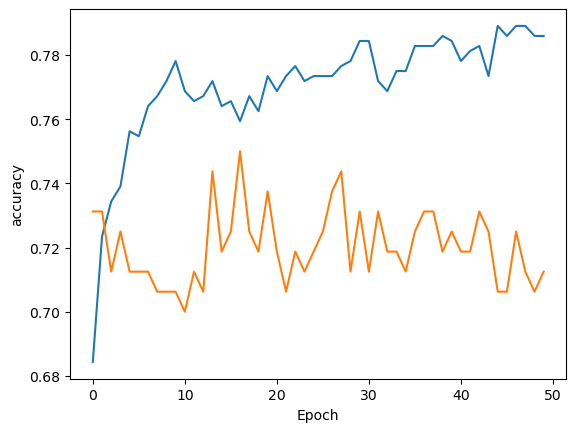

In [62]:
# Solution
plt.plot(history.history['accuracy'], label='training')
plt.plot(history.history['val_accuracy'], label='validation')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.show()

### 7.   Push changes

**[7.1]** Add you changes to git staging area

In [63]:
# Placeholder for student's code (command line)

In [ ]:
# Solution:
git add .

**[7.2]** Create the snapshot of your repository and add a description

In [ ]:
# Placeholder for student's code (command line)

In [ ]:
# Solution:
git commit -m "third tf model"

**[7.3]** Push your snapshot to Github

In [ ]:
# Placeholder for student's code (command line)

In [ ]:
# Solution:
git push

**[7.4]** Go to Github and merge the branch after reviewing the code and fixing any conflict


**[7.5]** Check out to the master branch

In [ ]:
# Placeholder for student's code (command line)

In [ ]:
# Solution:
git checkout master

**[7.6]** Pull the latest updates


In [ ]:
# Placeholder for student's code (command line)

In [ ]:
git pull

**[7.7]** Stop the Docker container

In [ ]:
# Placeholder for student's code (command line)

In [ ]:
# Solution
docker stop adv_mla_lab_8

Documentation: https://docs.docker.com/engine/reference/commandline/stop/